In [1]:
!pip install pandas_datareader

You should consider upgrading via the 'C:\Users\admin\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas_datareader as pdr
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [3]:
data=pdr.get_data_yahoo('TTM')
df=data.drop(['High', 'Low','Open','Adj Close','Volume'], axis = 1)
df=df.reset_index()
#df.rename({'Close':'p_stnet'},inplace=True,axis=1)
df

,Date,Close
0,2017-06-05,37.000000
1,2017-06-06,35.849998
2,2017-06-07,35.599998
3,2017-06-08,35.709999
4,2017-06-09,35.529999
...,...,...
1255,2022-05-27,28.190001
1256,2022-05-31,28.500000
1257,2022-06-01,28.629999
1258,2022-06-02,28.799999


In [4]:
df["Date_"] = pd.to_datetime(df.Date,format="%b-%y")
df["Month"] = df.Date_.dt.strftime("%b") # month extraction
df["year"] = df.Date_.dt.strftime("%Y") # year extraction
df=df.iloc[:,1:]
df

,Close,Date_,Month,year
0,37.000000,2017-06-05,Jun,2017
1,35.849998,2017-06-06,Jun,2017
2,35.599998,2017-06-07,Jun,2017
3,35.709999,2017-06-08,Jun,2017
4,35.529999,2017-06-09,Jun,2017
...,...,...,...,...
1255,28.190001,2022-05-27,May,2022
1256,28.500000,2022-05-31,May,2022
1257,28.629999,2022-06-01,Jun,2022
1258,28.799999,2022-06-02,Jun,2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Close   1260 non-null   float64       
 1   Date_   1260 non-null   datetime64[ns]
 2   Month   1260 non-null   object        
 3   year    1260 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 39.5+ KB


In [6]:
df['Close']=df['Close'].astype('int64')

In [7]:
df['t']=[i for i in range(1,len(df)+1)]
df['t_square']=[i**2 for i in df['t']]
df

,Close,Date_,Month,year,t,t_square
0,37,2017-06-05,Jun,2017,1,1
1,35,2017-06-06,Jun,2017,2,4
2,35,2017-06-07,Jun,2017,3,9
3,35,2017-06-08,Jun,2017,4,16
4,35,2017-06-09,Jun,2017,5,25
...,...,...,...,...,...,...
1255,28,2022-05-27,May,2022,1256,1577536
1256,28,2022-05-31,May,2022,1257,1580049
1257,28,2022-06-01,Jun,2022,1258,1582564
1258,28,2022-06-02,Jun,2022,1259,1585081


<AxesSubplot:xlabel='Month', ylabel='year'>

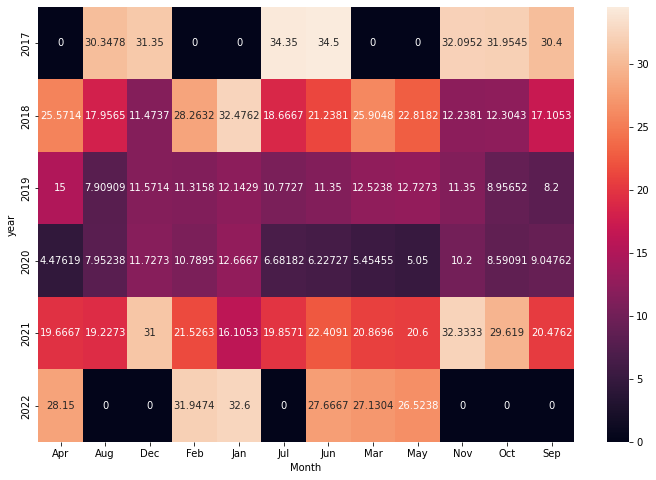

In [8]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values='Close',index="year",columns="Month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Close'>

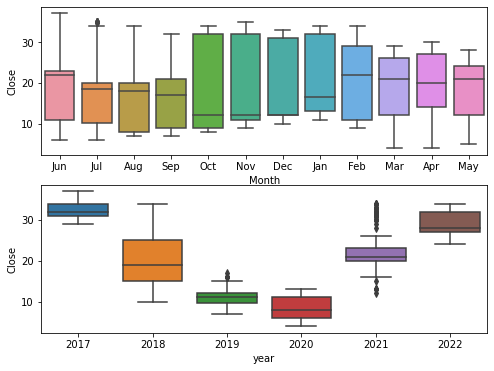

In [9]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="Month",y="Close",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Close",data=df)

<AxesSubplot:xlabel='year', ylabel='Close'>

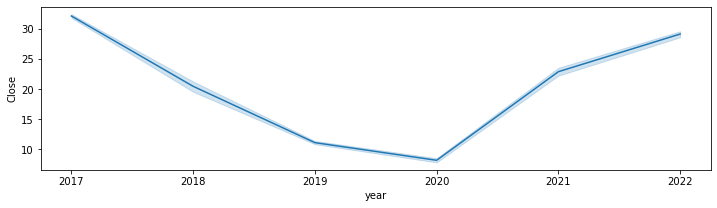

In [10]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Close",data=df)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Close     1260 non-null   int64         
 1   Date_     1260 non-null   datetime64[ns]
 2   Month     1260 non-null   object        
 3   year      1260 non-null   object        
 4   t         1260 non-null   int64         
 5   t_square  1260 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 59.2+ KB


In [12]:
#one hot encoding
df1= pd.get_dummies(df.Month)
df = pd.concat([df, df1], axis=1)
df

,Close,Date_,Month,year,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,37,2017-06-05,Jun,2017,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,35,2017-06-06,Jun,2017,2,4,0,0,0,0,0,0,1,0,0,0,0,0
2,35,2017-06-07,Jun,2017,3,9,0,0,0,0,0,0,1,0,0,0,0,0
3,35,2017-06-08,Jun,2017,4,16,0,0,0,0,0,0,1,0,0,0,0,0
4,35,2017-06-09,Jun,2017,5,25,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,28,2022-05-27,May,2022,1256,1577536,0,0,0,0,0,0,0,0,1,0,0,0
1256,28,2022-05-31,May,2022,1257,1580049,0,0,0,0,0,0,0,0,1,0,0,0
1257,28,2022-06-01,Jun,2022,1258,1582564,0,0,0,0,0,0,1,0,0,0,0,0
1258,28,2022-06-02,Jun,2022,1259,1585081,0,0,0,0,0,0,1,0,0,0,0,0


In [13]:
Train = df.head(len(df)-365)
Test = df.tail(365)


# Forecasting using model base method

In [14]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Close~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_linear))**2))
rmse_linear

29.75926510507314

In [15]:
#Quadratic 

Quad = smf.ols('Close~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_Quad))**2))
rmse_Quad

10.407869496225796

In [16]:
#Additive seasonality 

add_sea = smf.ols('Close~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_add_sea))**2))
rmse_add_sea

10.168452849180161

In [17]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Close~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Close'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

9.090638918719241

In [18]:
#Compare the results 

data = {"MODEL":pd.Series(["linear","Quad","add_sea","add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Quad,rmse_add_sea,rmse_add_sea_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,add_sea_quad,9.090639
2,add_sea,10.168453
1,Quad,10.407869
0,linear,29.759265


In [19]:
df

,Close,Date_,Month,year,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,37,2017-06-05,Jun,2017,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,35,2017-06-06,Jun,2017,2,4,0,0,0,0,0,0,1,0,0,0,0,0
2,35,2017-06-07,Jun,2017,3,9,0,0,0,0,0,0,1,0,0,0,0,0
3,35,2017-06-08,Jun,2017,4,16,0,0,0,0,0,0,1,0,0,0,0,0
4,35,2017-06-09,Jun,2017,5,25,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,28,2022-05-27,May,2022,1256,1577536,0,0,0,0,0,0,0,0,1,0,0,0
1256,28,2022-05-31,May,2022,1257,1580049,0,0,0,0,0,0,0,0,1,0,0,0
1257,28,2022-06-01,Jun,2022,1258,1582564,0,0,0,0,0,0,1,0,0,0,0,0
1258,28,2022-06-02,Jun,2022,1259,1585081,0,0,0,0,0,0,1,0,0,0,0,0


AttributeError: 'DataFrame' object has no attribute 'forecasted_Close'

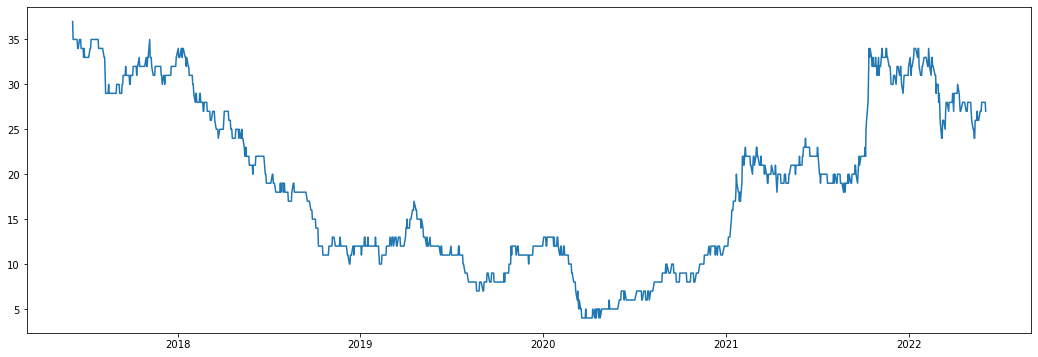

In [61]:
#Graph Show forecasted value by model base method Additive Seasonality Quadratic 
fig2,ax=plt.subplots(1,1,figsize=(18,6))
ax.plot(vertical_concat.Date_,vertical_concat.Close,label="org")
ax.plot(vertical_concat.Date_,vertical_concat.forecasted_Close,label="forecasted")

Creating predicting Dataset

##  Creating Forcasting   dataset


In [20]:
x=df.iloc[-1,1]
rng = pd.date_range(start=x, periods=365, freq='D',tz=None)
pr = pd.DataFrame(rng)
pr["Date_"] = pd.to_datetime(pr.iloc[:,0],format="%b-%y")
pr["Month"] = pr.Date_.dt.strftime("%b") # month extraction
pr["year"] = pr.Date_.dt.strftime("%Y") # year extraction
pr=pr.iloc[:,1:]
pr

,Date_,Month,year
0,2022-06-03,Jun,2022
1,2022-06-04,Jun,2022
2,2022-06-05,Jun,2022
3,2022-06-06,Jun,2022
4,2022-06-07,Jun,2022
...,...,...,...
360,2023-05-29,May,2023
361,2023-05-30,May,2023
362,2023-05-31,May,2023
363,2023-06-01,Jun,2023


In [21]:
#one hot encoding
pr1= pd.get_dummies(pr.Month)
pr1


,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
360,0,0,0,0,0,0,0,0,1,0,0,0
361,0,0,0,0,0,0,0,0,1,0,0,0
362,0,0,0,0,0,0,0,0,1,0,0,0
363,0,0,0,0,0,0,1,0,0,0,0,0


In [22]:
predict_data= pd.concat([pr, pr1], axis=1)
predict_data

,Date_,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,2022-06-03,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0
1,2022-06-04,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0
2,2022-06-05,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0
3,2022-06-06,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0
4,2022-06-07,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-05-29,May,2023,0,0,0,0,0,0,0,0,1,0,0,0
361,2023-05-30,May,2023,0,0,0,0,0,0,0,0,1,0,0,0
362,2023-05-31,May,2023,0,0,0,0,0,0,0,0,1,0,0,0
363,2023-06-01,Jun,2023,0,0,0,0,0,0,1,0,0,0,0,0


In [23]:
predict_data['t']=[i for i in range(len(df)+1,len(df)+366)]
predict_data['t_square']=[i**2 for i in predict_data['t']]
predict_data_1=predict_data
predict_data_1

,Date_,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square
0,2022-06-03,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1261,1590121
1,2022-06-04,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1262,1592644
2,2022-06-05,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1263,1595169
3,2022-06-06,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1264,1597696
4,2022-06-07,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1265,1600225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-05-29,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1621,2627641
361,2023-05-30,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1622,2630884
362,2023-05-31,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1623,2634129
363,2023-06-01,Jun,2023,0,0,0,0,0,0,1,0,0,0,0,0,1624,2637376


In [24]:
#combining Data Row wise (adding for one year after 2006)
vertical_concat = pd.concat([df, predict_data_1], axis=0)
vertical_concat


,Close,Date_,Month,year,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,37.0,2017-06-05,Jun,2017,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,35.0,2017-06-06,Jun,2017,2,4,0,0,0,0,0,0,1,0,0,0,0,0
2,35.0,2017-06-07,Jun,2017,3,9,0,0,0,0,0,0,1,0,0,0,0,0
3,35.0,2017-06-08,Jun,2017,4,16,0,0,0,0,0,0,1,0,0,0,0,0
4,35.0,2017-06-09,Jun,2017,5,25,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,NaN,2023-05-29,May,2023,1621,2627641,0,0,0,0,0,0,0,0,1,0,0,0
361,NaN,2023-05-30,May,2023,1622,2630884,0,0,0,0,0,0,0,0,1,0,0,0
362,NaN,2023-05-31,May,2023,1623,2634129,0,0,0,0,0,0,0,0,1,0,0,0
363,NaN,2023-06-01,Jun,2023,1624,2637376,0,0,0,0,0,0,1,0,0,0,0,0


In [25]:
vertical_concat=vertical_concat.reset_index()
vertical_concat

,index,Close,Date_,Month,year,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,37.0,2017-06-05,Jun,2017,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1,35.0,2017-06-06,Jun,2017,2,4,0,0,0,0,0,0,1,0,0,0,0,0
2,2,35.0,2017-06-07,Jun,2017,3,9,0,0,0,0,0,0,1,0,0,0,0,0
3,3,35.0,2017-06-08,Jun,2017,4,16,0,0,0,0,0,0,1,0,0,0,0,0
4,4,35.0,2017-06-09,Jun,2017,5,25,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,360,NaN,2023-05-29,May,2023,1621,2627641,0,0,0,0,0,0,0,0,1,0,0,0
1621,361,NaN,2023-05-30,May,2023,1622,2630884,0,0,0,0,0,0,0,0,1,0,0,0
1622,362,NaN,2023-05-31,May,2023,1623,2634129,0,0,0,0,0,0,0,0,1,0,0,0
1623,363,NaN,2023-06-01,Jun,2023,1624,2637376,0,0,0,0,0,0,1,0,0,0,0,0


In [26]:
vertical_concat.drop(['index'],axis=1,inplace=True)
vertical_concat 

,Close,Date_,Month,year,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,37.0,2017-06-05,Jun,2017,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,35.0,2017-06-06,Jun,2017,2,4,0,0,0,0,0,0,1,0,0,0,0,0
2,35.0,2017-06-07,Jun,2017,3,9,0,0,0,0,0,0,1,0,0,0,0,0
3,35.0,2017-06-08,Jun,2017,4,16,0,0,0,0,0,0,1,0,0,0,0,0
4,35.0,2017-06-09,Jun,2017,5,25,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,NaN,2023-05-29,May,2023,1621,2627641,0,0,0,0,0,0,0,0,1,0,0,0
1621,NaN,2023-05-30,May,2023,1622,2630884,0,0,0,0,0,0,0,0,1,0,0,0
1622,NaN,2023-05-31,May,2023,1623,2634129,0,0,0,0,0,0,0,0,1,0,0,0
1623,NaN,2023-06-01,Jun,2023,1624,2637376,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
#Data Splitting 
Train = vertical_concat.head(len(vertical_concat)-365)
Test = vertical_concat.tail(365)

In [28]:
#Build the model on entire data set
add_sea_Quad = smf.ols('Close~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()

In [29]:
#predicting for next year 
pred_new  = pd.Series(add_sea_Quad.predict(vertical_concat))
#print(pred_new)
predict_data["forecasted_Close"] = pd.Series(pred_new)
predict_data

,Date_,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,forecasted_Close
0,2022-06-03,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1261,1590121,38.815657
1,2022-06-04,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1262,1592644,38.722577
2,2022-06-05,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1263,1595169,38.629641
3,2022-06-06,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1264,1597696,38.536848
4,2022-06-07,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1265,1600225,38.444198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-05-29,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1621,2627641,16.563990
361,2023-05-30,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1622,2630884,16.522497
362,2023-05-31,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1623,2634129,16.481148
363,2023-06-01,Jun,2023,0,0,0,0,0,0,1,0,0,0,0,0,1624,2637376,16.439942


#Predicting for entire Dataset
pred_entire  = pd.Series(add_sea_Quad.predict(vertical_concat))
len(pred_entire)

In [30]:
vertical_concat

,Close,Date_,Month,year,t,t_square,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,37.0,2017-06-05,Jun,2017,1,1,0,0,0,0,0,0,1,0,0,0,0,0
1,35.0,2017-06-06,Jun,2017,2,4,0,0,0,0,0,0,1,0,0,0,0,0
2,35.0,2017-06-07,Jun,2017,3,9,0,0,0,0,0,0,1,0,0,0,0,0
3,35.0,2017-06-08,Jun,2017,4,16,0,0,0,0,0,0,1,0,0,0,0,0
4,35.0,2017-06-09,Jun,2017,5,25,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1620,NaN,2023-05-29,May,2023,1621,2627641,0,0,0,0,0,0,0,0,1,0,0,0
1621,NaN,2023-05-30,May,2023,1622,2630884,0,0,0,0,0,0,0,0,1,0,0,0
1622,NaN,2023-05-31,May,2023,1623,2634129,0,0,0,0,0,0,0,0,1,0,0,0
1623,NaN,2023-06-01,Jun,2023,1624,2637376,0,0,0,0,0,0,1,0,0,0,0,0


# Forecasting using Data Driven Models

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing 

In [32]:
#Data Splitting
Train = df.head(len(df)-365)
Test = df.tail(365)

Moving Average

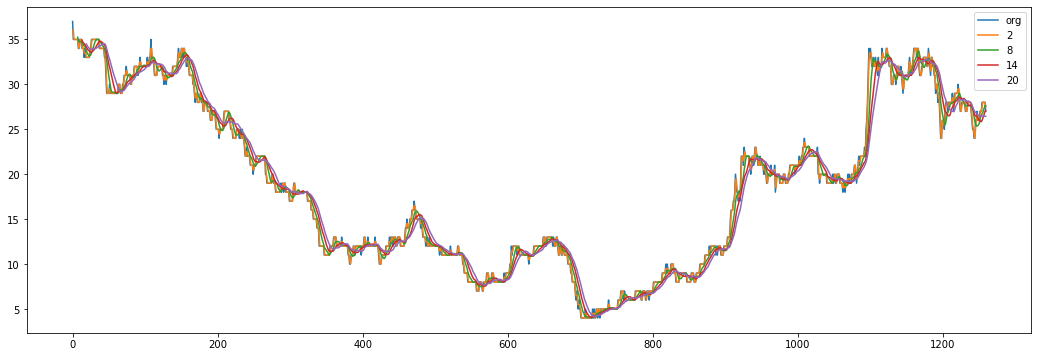

In [33]:
plt.figure(figsize=(18,6))
df.Close.plot(label="org")
for i in range(2,24,6):
    df["Close"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

Time series decomposition plot 

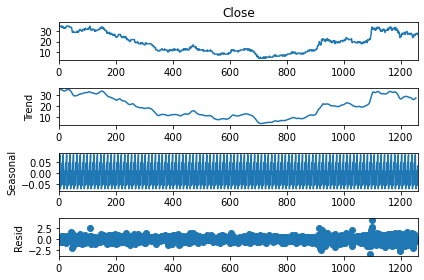

In [34]:
decompose_ts_add = seasonal_decompose(df.Close,period=12)
decompose_ts_add.plot()
plt.show()

 ACF plots and PACF plots

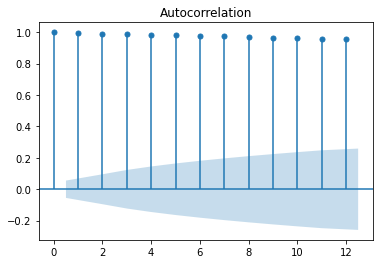

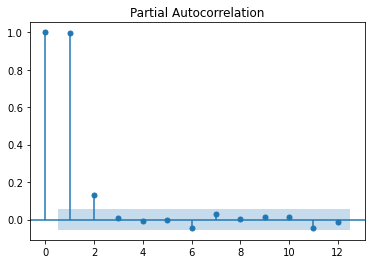

In [35]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Close,lags=12)
tsa_plots.plot_pacf(df.Close,lags=12)
plt.show()

Evaluation Metric MAPE

In [36]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [37]:
#Data Splitting
Train = df.head(len(df)-365)
Test = df.tail(365)

Simple Exponential Method

In [38]:
ses_model = SimpleExpSmoothing(Train["Close"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Close) 

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


49.58584018739123

Holt method 

In [39]:
# Holt method 
hw_model = Holt(Train["Close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Close) 

C:\Users\admin\AppData\Local\Temp/ipykernel_5248/1959663654.py:2: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  hw_model = Holt(Train["Close"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


136.66300211678373

Holts winter exponential smoothing with additive seasonality and additive trend


In [40]:
hwe_model_add_add = ExponentialSmoothing(Train["Close"],seasonal="add",trend="add",seasonal_periods=12).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Close) 

70.91824916925245

In [41]:
#Compare the results 

data = {"MODEL":pd.Series(["ses_model","hw_model","hwe_model_add_add"]),"RMSE_Values":pd.Series([MAPE(pred_ses,Test.Close),MAPE(pred_hw,Test.Close),MAPE(pred_hwe_add_add,Test.Close)])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
0,ses_model,49.585840
2,hwe_model_add_add,70.918249
1,hw_model,136.663002


In [42]:
#Data Splitting
Train = vertical_concat.head(len(vertical_concat)-365)
Test = vertical_concat.tail(365)
print(len(Train))

1260


In [43]:
#Build the model on entire data set
ses_model = SimpleExpSmoothing(Train["Close"]).fit(smoothing_level=0.2)

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [44]:
#Forecasting for next 365 time periods
ses_model.forecast(365)

1260    27.403273
1261    27.403273
1262    27.403273
1263    27.403273
1264    27.403273
          ...    
1620    27.403273
1621    27.403273
1622    27.403273
1623    27.403273
1624    27.403273
Length: 365, dtype: float64

In [45]:
#Result is not good so build second best model
hwe_model_add_add = ExponentialSmoothing(df["Close"],seasonal="add",trend="add",seasonal_periods=4).fit()
#Forecasting for next 24 time periods 
result=hwe_model_add_add.forecast(365)
result

1260    27.134649
1261    27.123987
1262    27.151349
1263    27.219953
1264    27.200902
          ...    
1620    33.097434
1621    33.086773
1622    33.114134
1623    33.182738
1624    33.163688
Length: 365, dtype: float64

In [46]:
#forecasted result by data driven model
result=result.reset_index()
result=result.iloc[:,1]
result
predict_data["forecasted_Close_hwe_model_add_add"] = result
predict_data

,Date_,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,forecasted_Close,forecasted_Close_hwe_model_add_add
0,2022-06-03,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1261,1590121,38.815657,27.134649
1,2022-06-04,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1262,1592644,38.722577,27.123987
2,2022-06-05,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1263,1595169,38.629641,27.151349
3,2022-06-06,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1264,1597696,38.536848,27.219953
4,2022-06-07,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1265,1600225,38.444198,27.200902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-05-29,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1621,2627641,16.563990,33.097434
361,2023-05-30,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1622,2630884,16.522497,33.086773
362,2023-05-31,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1623,2634129,16.481148,33.114134
363,2023-06-01,Jun,2023,0,0,0,0,0,0,1,0,0,0,0,0,1624,2637376,16.439942,33.182738


In [47]:
predict_data_1=predict_data.iloc[:,0:17]
predict_data_1["Close"] = result
predict_data_1

,Date_,Month,year,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,Close
0,2022-06-03,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1261,1590121,27.134649
1,2022-06-04,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1262,1592644,27.123987
2,2022-06-05,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1263,1595169,27.151349
3,2022-06-06,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1264,1597696,27.219953
4,2022-06-07,Jun,2022,0,0,0,0,0,0,1,0,0,0,0,0,1265,1600225,27.200902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2023-05-29,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1621,2627641,33.097434
361,2023-05-30,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1622,2630884,33.086773
362,2023-05-31,May,2023,0,0,0,0,0,0,0,0,1,0,0,0,1623,2634129,33.114134
363,2023-06-01,Jun,2023,0,0,0,0,0,0,1,0,0,0,0,0,1624,2637376,33.182738


In [48]:
#assigning forcasted value for year 
vertical_concat_1 = pd.concat([df, predict_data_1], axis=0)
vertical_concat_1=vertical_concat_1.iloc[:,0:4]
vertical_concat_1

,Close,Date_,Month,year
0,37.000000,2017-06-05,Jun,2017
1,35.000000,2017-06-06,Jun,2017
2,35.000000,2017-06-07,Jun,2017
3,35.000000,2017-06-08,Jun,2017
4,35.000000,2017-06-09,Jun,2017
...,...,...,...,...
360,33.097434,2023-05-29,May,2023
361,33.086773,2023-05-30,May,2023
362,33.114134,2023-05-31,May,2023
363,33.182738,2023-06-01,Jun,2023


In [49]:
vertical_concat_1.reset_index(inplace=True)

In [50]:
vertical_concat_1.drop(['index'],axis=1,inplace=True)
vertical_concat_1

,Close,Date_,Month,year
0,37.000000,2017-06-05,Jun,2017
1,35.000000,2017-06-06,Jun,2017
2,35.000000,2017-06-07,Jun,2017
3,35.000000,2017-06-08,Jun,2017
4,35.000000,2017-06-09,Jun,2017
...,...,...,...,...
1620,33.097434,2023-05-29,May,2023
1621,33.086773,2023-05-30,May,2023
1622,33.114134,2023-05-31,May,2023
1623,33.182738,2023-06-01,Jun,2023


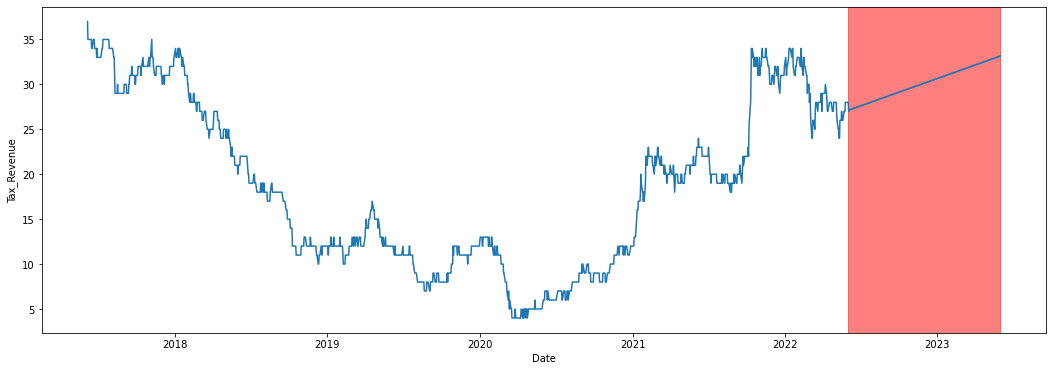

In [51]:
#shaded region show forecsated value by Data Driven Models (Holts winter exponential smoothing with additive seasonality and additive trend)
fig3,ax=plt.subplots(1,1,figsize=(18,6))
ax.plot(vertical_concat_1.Date_,vertical_concat_1.Close,label="org")
ax.set(xlabel='Date', ylabel='Tax_Revenue')
plt.axvspan('2022-06-01','2023-05-31', color='red', alpha=0.5)

# Forecasting using ARIMA

In [52]:
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
#data_org = read_csv('CocaCola_Sales_Rawdata_org.csv', index_col=0, parse_dates=True, squeeze=True)
X=df['Close'].values

#Data Splitting
Train_size = int(len(df)-365)
Train,Test=X[0:Train_size],X[Train_size:]
 
#print(len(Train))
#X = X.astype('float32')
#train_size=int(len(X)*0.50)
#train,test=X[0:train_size],X[train_size:]
print(len(X))


1260


In [53]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=365)[0]


C:\Users\admin\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


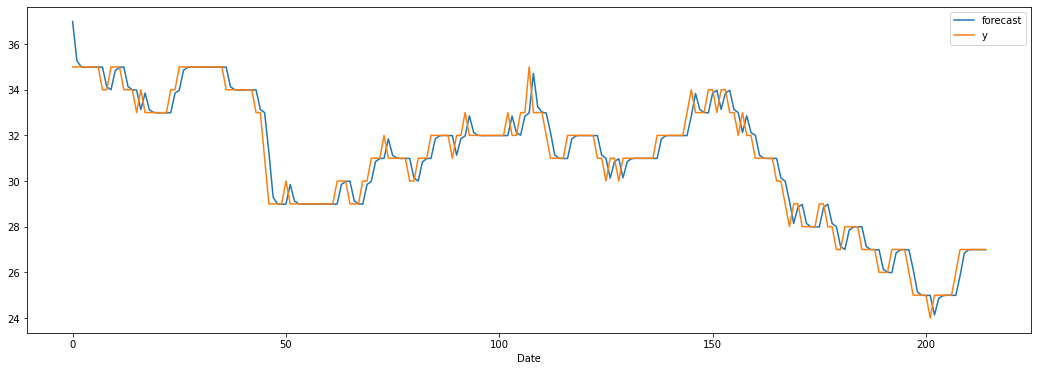

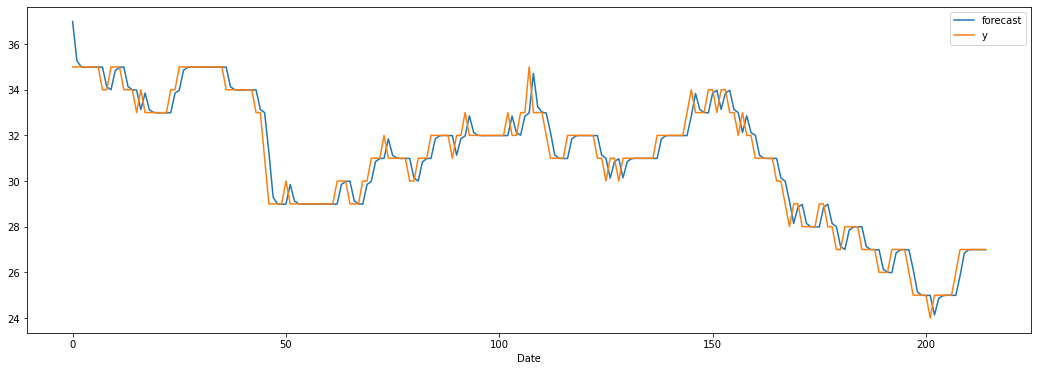

In [54]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
plt.xlabel("Date")
model_fit.plot_predict(1, 215,ax=ax)

for better visibility plot from 150 to 103

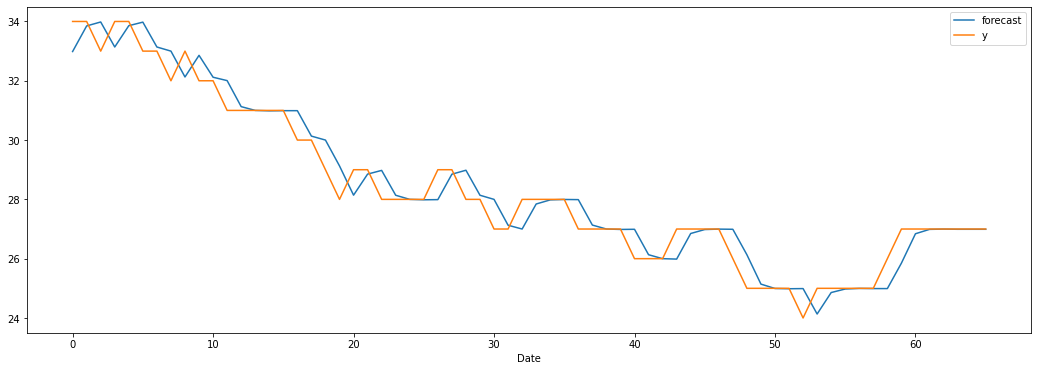

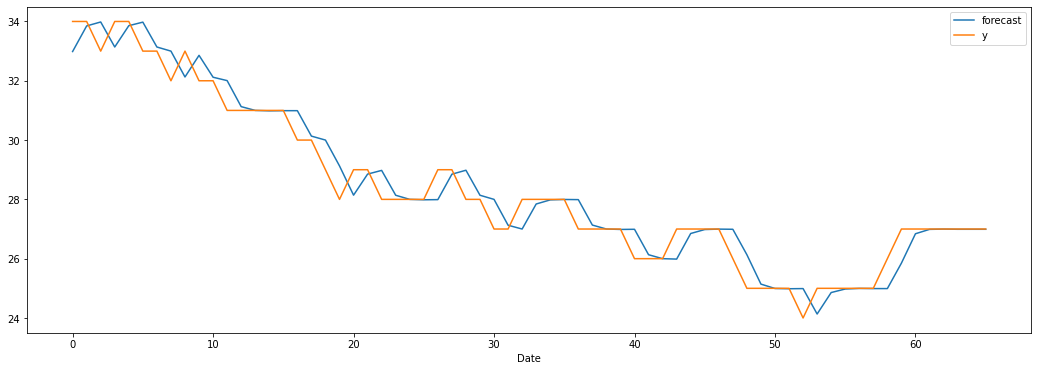

In [55]:
fig,ax=plt.subplots(1,1,figsize=(18,6))
plt.xlabel("Date")
model_fit.plot_predict(150, 215,ax=ax)
